In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import scanpy as sc
import scipy as sp
import anndata as ad
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
in_dir = '../../results/08_mouse_ssc/02_clustering'
out_dir = '../../results/08_mouse_ssc/03_annotation'
os.makedirs(out_dir, exist_ok=True)

In [3]:
adata = sc.read_h5ad(f'{in_dir}/adata.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 70820 × 18503
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_counts', 'n_genes', 'time_point', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'time_point_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

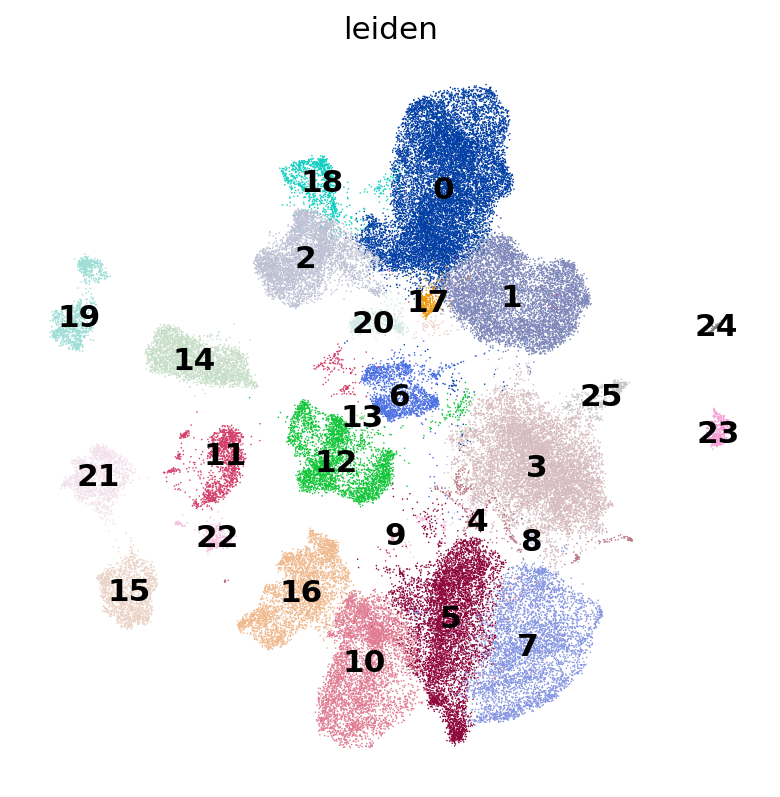

In [4]:
sc.set_figure_params(figsize=(6, 6))

sc.pl.umap(adata, color=["leiden"], size=2, frameon=False, legend_loc='on data')

In [5]:
## annotate clusters
adata.obs['cell_type'] = adata.obs['leiden']
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b0\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b1\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b2\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b17\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b18\b', 'Fibroblasts', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b20\b', 'Fibroblasts', regex=True)

In [6]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b6\b', 'Pericyte/VSMC', regex=True)

In [7]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b13\b', 'APM', regex=True)

In [8]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b12\b', 'EC', regex=True)

In [9]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b14\b', 'LEC', regex=True)

In [10]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b3\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b4\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b5\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b7\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b8\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b9\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b10\b', 'Keratinocytes', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b16\b', 'Keratinocytes', regex=True)

In [11]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b25\b', 'Adipocyte', regex=True)

In [12]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b23\b', 'Melanocyte', regex=True)

In [13]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b24\b', 'Red blood cells', regex=True)

In [14]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b19\b', 'Neutral cells', regex=True)

In [15]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b11\b', 'Mast cells', regex=True)

In [16]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b15\b', 'γδ T cells', regex=True)
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b21\b', 'ɑβ cells', regex=True)

In [17]:
adata.obs['cell_type'] = adata.obs['cell_type'].str.replace(r'\b22\b', 'Myeloid cell', 
                                                            regex=True)

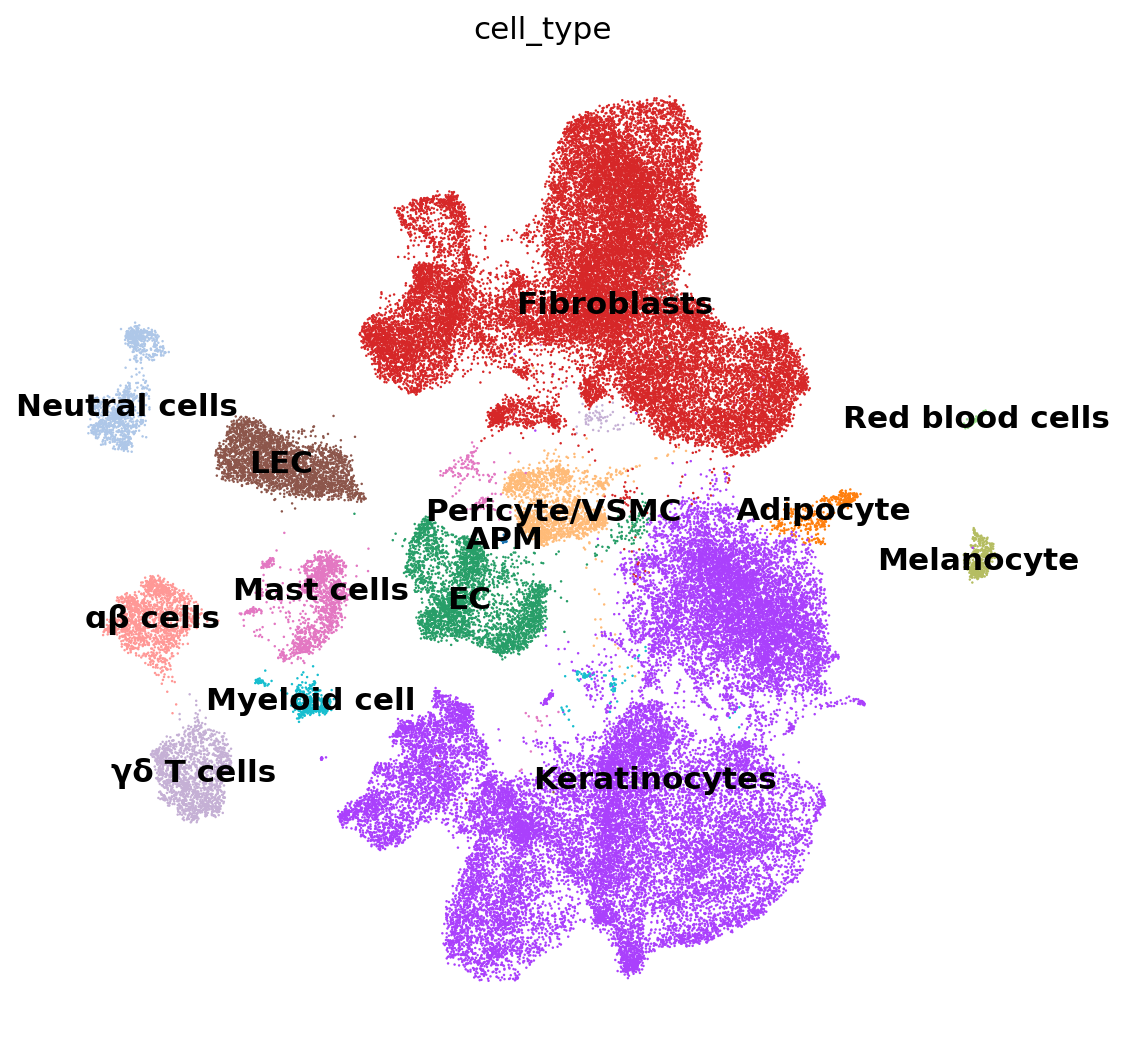

In [18]:
sc.set_figure_params(figsize=(8, 8))

sc.pl.umap(adata, color=["cell_type"], size=5, frameon=False, legend_loc='on data')

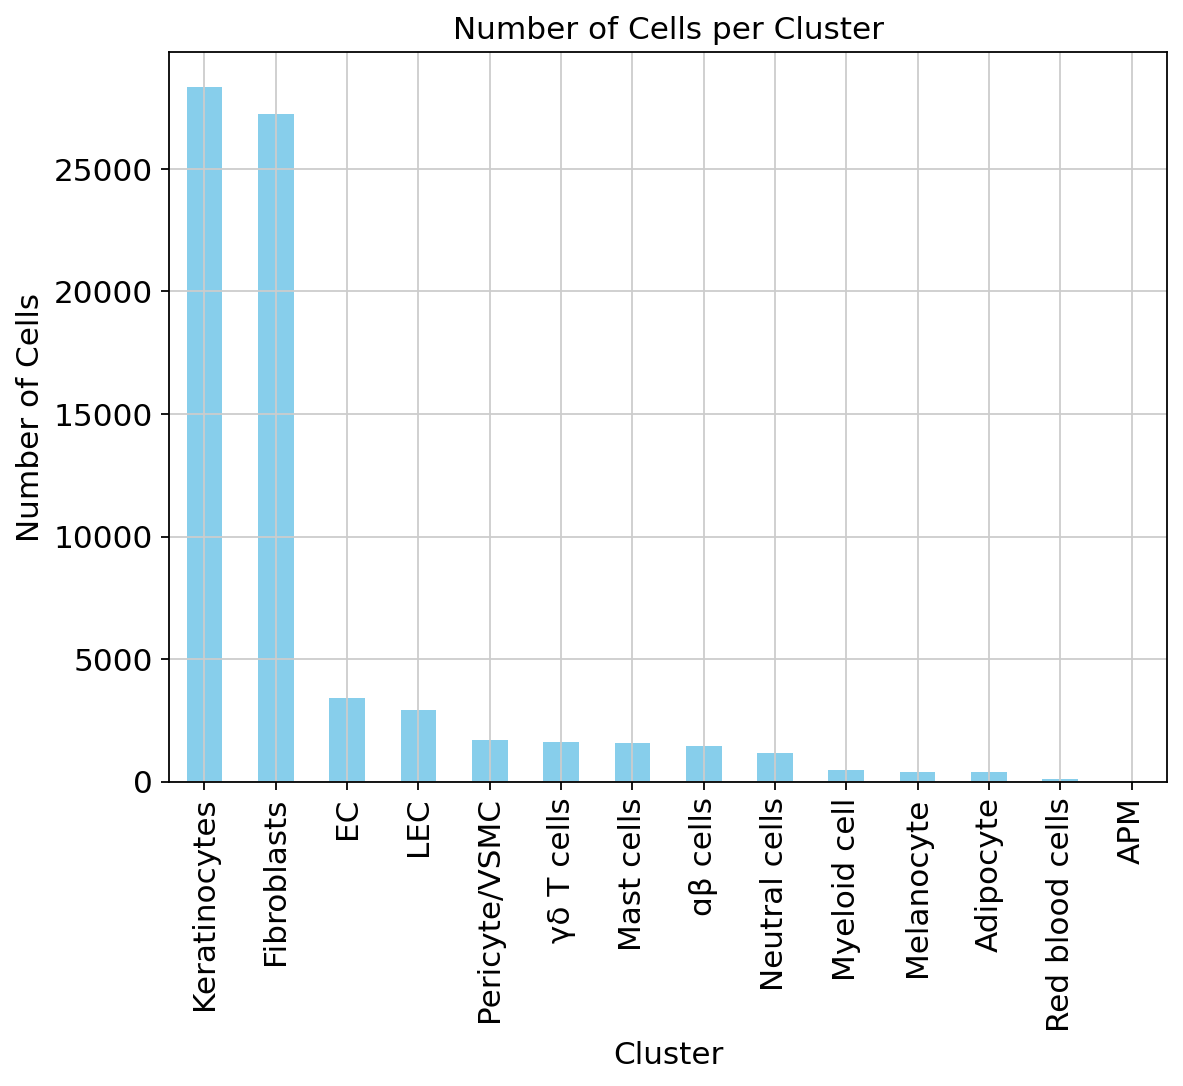

In [22]:
# Count cells per cluster and sort by cell count
cluster_counts = adata.obs["cell_type"].value_counts().sort_values(ascending=False)


# Plot bar plot
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Cells')
plt.title('Number of Cells per Cluster')
plt.xticks(rotation=90)
plt.show()

In [23]:
adata.write_h5ad(f'{out_dir}/adata.h5ad')